#Convergence of explicit finite difference formulations demonstrated on derivatives

In [17]:
cd pyfiles/

[Errno 2] No such file or directory: 'pyfiles/'
/home/dsirajud/Work/IPython-notebooks/Convergence of FD calculations of derivatives/pyfiles


In [2]:
cd bin

/home/dsirajud/Work/IPython-notebooks/Convergence of FD calculations of derivatives/pyfiles/bin


We consider the infinitely differentiable function:

$$f(x) = \sin(\pi x) + 1 $$ 

which have derivatives ($n\in\mathbb{N}_1$) :

$$f^{(2n-1)}(x) = (-1)^{n+1} \pi^{2n - 1} \cos(\pi x)$$

and

$$f^{(2n)}(x) = (-1)^n \pi^{2n}\sin(\pi x)$$

Below, we plot the function as well as four normalized derivatives, the normalized derivatives of higher order are coincident with those plotted. Note, this is only to fit them on the same plot, for convergence we properly analyze the unnormalized forms.

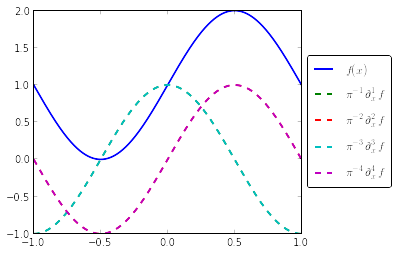

In [3]:
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,1000)
f =  np.sin(np.pi*x) + 1
nmax = 4 # maximum derivative desired to be plotted

fig, ax = plt.figure(), plt.subplot(111)

ax.plot(x,f, linewidth = 2, label = '$f(x)$')
ax.hold('on')

for n in range(1,nmax + 1):
    if np.mod(n,2) == 1: # n is odd
        dnf = (-1) ** (n + 1) * np.pi ** (2*n - 1) * np.cos(np.pi * x)
        dnf /= np.pi ** (2*n - 1) # i.e. we plot normalized derivatives

    else: # n is even
        dnf = (-1) ** n * np.pi ** (2*n) * np.sin(np.pi * x)
        dnf /= np.pi ** (2*n) # i.e. we plot normalized derivatives

    ax.plot(x,dnf, linewidth = 2, linestyle = '--', label = r'$\pi^{-%i}\partial_x^{%i} f$' % (n,n) )

ax.hold('off')
frame = ax.get_position() # position of plot center

# shrink frame of the plot to make room for a legend on the right side
ax.set_position([frame.x0, frame.y0, 
                 frame.width * 0.8, frame.height])

# Place legend to the right of the shrunken frame
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, ncol=1)

plt.show()


We can use the script pyfiles/bin/generate_tables_of_finite_difference_schemes_for_a_given_LTE.py to generate tables of explicit finite difference schemes for grids with uniform spacing $\Delta x$ for a chosen order of derivative and a specified maximum LTE. For example, if we desire an LTE (sys.argv[1]) of 1 and want the family of finite difference schemes corresponding to the second derivative 2 (sys.argv[2]), we run from the terminal 

or, interactively we call the main function:

In [4]:
import generate_tables_of_finite_difference_schemes_for_a_given_LTE

generate_tables_of_finite_difference_schemes_for_a_given_LTE.main(LTE = 1, dn = 2)

which produces the table

The weights of which are well-known, the labeling 'forward', 'central', and 'backward' indicate the handedness of the grid sampling for each scheme while the the associated number 0 communicates the degree of asymmetry from those schemes (central always has 0 asymmetry due to its definition). For example, a forward 0 scheme has a stencil that samples grid points strictly forward of point of interest, a forward 1 scheme has a stencil that samples one grid point backward and the rest forward (consider stencils greater than 3 for an instance, e.g. 2nd derivative with LTE = 2 has 2 + 2 = 4 grid points in the stencil for these explicit schemes), and so on. If a non-central scheme is more aptly named according to a different scheme (e.g. the 'forward 1' [and 'backward 1'] above is better known as the central scheme), the namechange is commited in favor of the corresponding asymmetric labeling 'forward/backward 1'. Note, the central scheme is actually second order because the first order term fortuitously cancels, this is also well-known. Thus, the script generates a family of schemes guaranteed to be at least the chosen LTE, though in the event a central scheme exists a serendipitous cancellation of an extra order term in the truncation error occurs raising its LTE order. This fortune, we say from experience, never happens for forward or backward schemes, so the script can be said to generate families of forward/backward schemes of the chosen LTE and the central scheme of at least the chosen LTE, though it may be more accurate.

The weights $\{w\}$ and stencil $\{i\}$ can be used to calculate the derivative according:

\begin{equation}f^{(n)}(x) = \tfrac{1}{(\Delta x)^n}\sum_i w_i f(x + i\Delta x)\end{equation}

## Test cases on first derivative with LTE = $O(\Delta x^3)$

For example, selecting one scheme in particular: a fully forward differencing scheme ('forward 0') at an LTE of order 3 for the second derivative. The following demonstrates convergence (where we apply the differencing near the edges by periodicity)

or, we generate the table interactively

In [5]:
import generate_tables_of_finite_difference_schemes_for_a_given_LTE

generate_tables_of_finite_difference_schemes_for_a_given_LTE.main(LTE = 3, dn = 1)

creates the table of finite difference coefficients "f1_LTE_3_FD_coefficients.dat" which is read and stored by pyfiles/main.py to use the scheme as needed. Running a convergence test for 10 grids where each subsequent grid has twice as many grid points as the previous,

### Convergence of a single scheme (edge sampling completed by periodicity)

Using the formulation just above, we run a mesh refinement exercise

In [6]:
cd ..

/home/dsirajud/Work/IPython-notebooks/Convergence of FD calculations of derivatives/pyfiles


slope of a linear fit = 2.99881 

order calculations at each refinement step:
Nx18        error = 0.0232967       ----
Nx36        error = 0.00294244       order = 2.98504
Nx72        error = 0.000368759       order = 2.99626
Nx144        error = 4.61247e-05       order = 2.99907
Nx288        error = 5.76652e-06       order = 2.99977
Nx576        error = 7.20844e-07       order = 2.99994
Nx1152        error = 9.01063e-08       order = 2.99999
Nx2304        error = 1.12632e-08       order = 3.00001
Nx4608        error = 1.40774e-09       order = 3.00017
Nx9216        error = 1.75673e-10       order = 3.00242




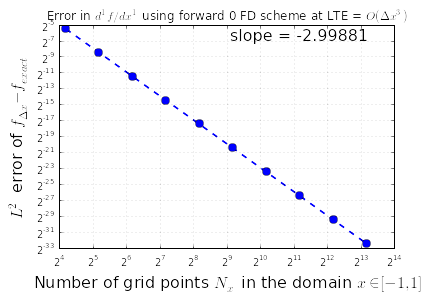

In [7]:
%matplotlib inline
from main import convergence_routine_single_scheme
convergence_routine_single_scheme(NumGrids = 10, Nx = 18, LTE = 3, dn = 1, handedness = 'forward', asymmetry = 0)

The "order" column reports the slope of the $L^2$ norms of the error between each mesh refinement, i.e.

$$\text{order}_i = \log_2\left(\frac{||f_{\Delta x} - f_{exact}||_{2}}{||f_{\Delta x/2} - f_{exact}||_{2}}\right)$$

where $|| g(x) ||_2 := \sqrt{ \frac{1}{L}\sum_i g(x_i)\Delta x_i}$ as usual, equivalently we could have elected to track the history ofthe fractional deviation of the $L^2$ norm from one grid spacing to the next rather than the $L^2$ norm itself. It can be seen this stepthrough only differs by a constant and hence predicts equivalent convergence.

In fact, the scripts above compute the infinity-norm as well, which give a larger error but which decreases with the same expected convergence.

### Convergence of the combination application of FD schemes that sample only grid points within the domain

Using one scheme runs into a problem at the edge where the differencing scheme requires grid sampling outside the domain, also looping through the summation form above is expensive. We wish to apply FD schemes of a given LTE (1) more efficiently ($\Rightarrow$ matrix formulation is desired), and (2) for nonperiodic functions ($\Rightarrow$ one-sided schemes (varying handedness and degrees of asymmetry must be used near the edges of the domain). This assembly is clearly to set up a matrix multiplication of a weight matrix $W$ with a grid vector $x$ so that 

$$\underline{\underline{W}}_{N\times N}\underline{x}_{N\times 1} = \underline{df}_{N\times 1}$$

gives the derivative vector $df$. The construction of $W$ is straightforward, its top row corresponds to the left-edge of the domain (forward 0 difference), the bottom row applies to the right-edge (backward 0 difference), the nodes well inside the interior can use the most asymmetric scheme of a given handedness (either a forward/backward scheme of maximum asymmetry or a central scheme should one exist [i.e. for stencil sizes that are odd]). Thus, the assembly of $W$ is as follows where we take the example of $N$ grid points with indices $i = 0, 1, \ldots , N-2, N-1$ for a derivative of order $dn$ of some chosen $LTE$ where the maximum degree of asymmetry is 2 (in general, the maximum asymmetry = [(LTE + dn) // 2 - 1] and the stencil is odd so that there exists a central scheme. 

$$\underbrace{\left( \begin{array}{c}
\text{forward 0} \\
\text{forward 1} \\
\text{forward 2} \\
\text{central 0} \\
\ldots \\
\text{central 0} \\
\text{central 0} \\
\text{central 0} \\
\ldots \\
\text{central 0} \\
\text{backward 2} \\
\text{backward 1} \\
\text{backward 0} \end{array} \right)}_{W_{N\times N}}
\underbrace{\left( \begin{array}{c}
x_0 \\
x_1 \\
x_2 \\
x_3 \\
\ldots \\
x_{N_{odd}/2 - 1} \\
x_{N_{odd}/2} \\
x_{N_{odd}/2 + 1} \\
\ldots \\
x_{N-4} \\
x_{N-3} \\
x_{N-2} \\
x_{N-1} \end{array} \right)}_{x_{N\times 1}} 
= 
\underbrace{\left( \begin{array}{c}
\frac{d^{dn}f}{dx^{dn}}(x_0)\\
\frac{d^{dn}f}{dx^{dn}}(x_1) \\
\frac{d^{dn}f}{dx^{dn}}(x_2) \\
\frac{d^{dn}f}{dx^{dn}}(x_3) \\
\ldots \\
\frac{d^{dn}f}{dx^{dn}}(x_{N_{odd}/2 - 1}) \\
\frac{d^{dn}f}{dx^{dn}}(x_{N_{odd}/2}) \\
\frac{d^{dn}f}{dx^{dn}}(x_{N_{odd}/2 + 1}) \\
\ldots \\
\frac{d^{dn}f}{dx^{dn}}(x_{N-4}) \\
\frac{d^{dn}f}{dx^{dn}}(x_{N-3}) \\
\frac{d^{dn}f}{dx^{dn}}(x_{N-2}) \\
\frac{d^{dn}f}{dx^{dn}}(x_{N-1}) \end{array} \right)}_{df_{N\times 1}} $$

In the event the stencil is even, there is no central scheme and instead the interior nodes are sampled with a differencing scheme in the generated tables that has maximum asymmetry (i.e. backward/forward schemes that are as centered as possible). corresponding to This setup is accomplished pyfiles/bin/main.FD_derivative_matrix_formulation by extracting the required schemes from a dictionary of dictionaries (of dictionaries of...) constructed in pyfiles/lib/make_FD_schemes_dict.store. We again consider $dn = 1$, $LTE= 3$, which reads a generated .dat table from

In [8]:
cd bin/

/home/dsirajud/Work/IPython-notebooks/Convergence of FD calculations of derivatives/pyfiles/bin


In [9]:
generate_tables_of_finite_difference_schemes_for_a_given_LTE.main(LTE = 3, dn = 1)

Which produces the table:

For an example, consider a domain consisting of 6 grid point $x_0, x_1, \ldots , x_5$. The weight matrix  $\underline{\underline{W}}$ would take the general form in the matrix equation:

$$\left(\begin{array}{c}
\text{forward 0} \\
\text{forward 1} \\
\text{forward 1} \\
\text{forward 1} \\
\text{backward 1} \\
\text{backward 0}
\end{array} \right)
\left( \begin{array}{c}
x_0 \\
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5 
\end{array} \right)
= \left(\begin{array}{c}
df(x_0)/dx \\
df(x_1)/dx \\
df(x_2)/dx \\
df(x_3)/dx \\
df(x_4)/dx \\
df(x_5)/dx 
\end{array} \right)$$


and the specific form, using the above table:

$$\left(\begin{array}{c c c c c c}
-1.833 & \phantom{-}3.000 & -1.500 & \phantom{-}0.333 & 0 & 0 \\
\phantom{-}0.333 & -0.500 & \phantom{-}1.000 & -0.167 & 0 & 0 \\
0 & -0.333 & -0.500 & \phantom{-}1.000 & -0.167 & 0 \\
0 & 0 & -0.333 & -0.500 & \phantom{-}1.000 & -0.166 \\
0 & 0 & \phantom{-}0.167 & -1.000 & 0.500 & 0.333 \\
0 & 0 & -0.333 & \phantom{-}1.500 & -3.000 & \phantom{-}1.833
\end{array} \right)
\left( \begin{array}{c}
x_0 \\
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5 
\end{array} \right)
= \left(\begin{array}{c}
df(x_0)/dx \\
df(x_1)/dx \\
df(x_2)/dx \\
df(x_3)/dx \\
df(x_4)/dx \\
df(x_5)/dx 
\end{array} \right)$$

A convergence routine can be run for the same case: $dn = 1$, $LTE = 3$ which now only samples grid points in the domain (i.e. without periodicity). The convergence is demonstrated through the following routine. The matrix product can be accomplished efficiently in python as 

Note, in NumPy, the multiplication operation * is a vectorizing component-wise product of elements, a matrix dot product must be employed as above.

In [10]:
cd ..

/home/dsirajud/Work/IPython-notebooks/Convergence of FD calculations of derivatives/pyfiles


slope of a linear fit = 3.02202 

order calculations at each refinement step:
Nx18        error = 0.0100579       ----
Nx36        error = 0.00102751       order = 3.2911
Nx72        error = 0.000123703       order = 3.0542
Nx144        error = 1.53877e-05       order = 3.00704
Nx288        error = 1.92238e-06       order = 3.00081
Nx576        error = 2.40285e-07       order = 3.00008
Nx1152        error = 3.00355e-08       order = 3
Nx2304        error = 3.75447e-09       order = 2.99999
Nx4608        error = 4.69352e-10       order = 2.99987
Nx9216        error = 5.87638e-11       order = 2.99767




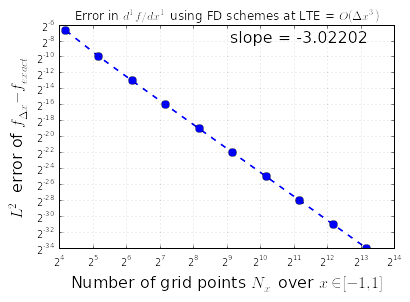

In [11]:
%matplotlib inline
from main import convergence_routine_nonperiodic
dummy_out1, dummy_out2 = convergence_routine_nonperiodic(NumGrids = 10, Nx = 18, LTE = 3, dn = 1)

This works smoothly for the first derivative, however for higher order derivatives we encounter optimal mesh spacings whereafter the derivatives begin to steadily (exponentially) increase with subsequent mesh refinement. First, to show that edge effects do not change the conclusion, we complete the grid sampling of the FD scheme using periodicity, and show the $L^2$ norm of the error continues to decrease as the mesh is refined but there exists an inflection point where the error steadily increases. We consider changes sign, we first show a central scheme for the $dn = 3$ and $LTE = 2$

# Numerical error accumulation for $d^{n}f/dx^{n}$, $dn > 1$

slope of a linear fit = 1.208 

order calculations at each refinement step:
Nx48        error = 0.0130053       ----
Nx96        error = 0.00162931       order = 2.99676
Nx192        error = 0.000203778       order = 2.99919
Nx384        error = 2.54759e-05       order = 2.9998
Nx768        error = 3.18459e-06       order = 2.99995
Nx1536        error = 3.98073e-07       order = 3
Nx3072        error = 5.00061e-08       order = 2.99286
Nx6144        error = 2.17495e-08       order = 1.20112
Nx12288        error = 8.37004e-08       order = -1.94425
Nx24576        error = 3.31379e-07       order = -1.98518
Nx49152        error = 1.44906e-06       order = -2.12856
Nx98304        error = 5.39037e-06       order = -1.89527




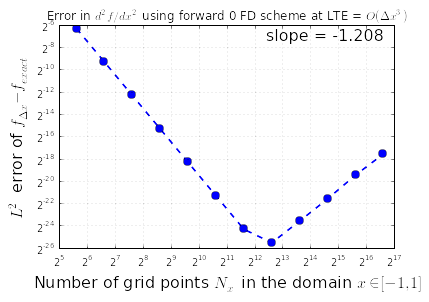

In [12]:
%matplotlib inline
convergence_routine_single_scheme(NumGrids = 12, Nx = 48, LTE = 3, dn = 2, handedness = 'forward', asymmetry = 0)

The error decreases with at a convergence rate of $O(\Delta x^3)$ as needed (see output table above) but for grids with total points $N_x > 6144$ ($\Delta x := L / N_x$ less than $\Delta x = (1 - (-1)) / 6144 = 0.000325520833$) an increase in error at $O(\Delta x^2$). Thus, there exists an optimal range of of grid spacings $\Delta x$.

We now show this also occurs for the matrix formulation (which, again, uses a host of schemes to sample only grid points within the domain without using periodicity):

slope of a linear fit = 2.53488 

order calculations at each refinement step:
Nx48        error = 0.00362603       ----
Nx96        error = 0.000330957       order = 3.45368
Nx192        error = 2.94869e-05       order = 3.4885
Nx384        error = 2.61148e-06       order = 3.49714
Nx768        error = 2.3093e-07       order = 3.49934
Nx1536        error = 2.03441e-08       order = 3.50477
Nx3072        error = 2.18513e-09       order = 3.21882
Nx6144        error = 5.13819e-09       order = -1.23354
Nx12288        error = 2.05223e-08       order = -1.99786




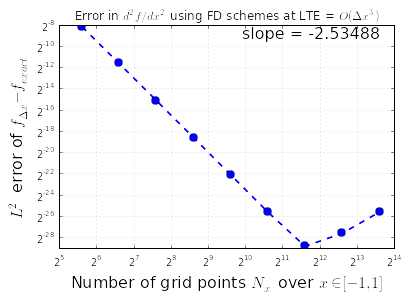

In [13]:
%matplotlib inline
from main import convergence_routine_nonperiodic
L2_error_dn2_LTE3, grids_dn2_LTE3 = convergence_routine_nonperiodic(NumGrids = 9, Nx = 48, LTE = 3, dn = 2, plots = 'yes')

Where the inflection point remains around $N_x \sim 2^{12}$ gives a range where the convergence is demonstrated. Note that the matrix formulation uses a central differencing scheme for interior nodes (producing $LTE = O(\Delta x^{3+1})$ as usual) and the asymmetric forward/backward schemes have truncation error $O(\Delta x^3)$. Thus, we anticipate the numerical convergnece to be between 3 ~ 4; this is sen to be true above (~ 3.5 for the range Nx64 ~ Nx512). The optimal grid size among the above is 512 grid points over $x\in [-1,1]$, or $\Delta x = L / N_x = (1 - (-1)) / 512 = 0.00390625$ per cell.

## Numerical error source terms, inflection points, and calculation of the rate of increase

The source of error increase at $N_x > 512$ is approximately of constant slope, indicating the LTE is contaminated by a term that becomes important for large $N_x$ ($\Delta x$ small). Since this not analytically predicted in the standard derivations of these schemes, the error must be numerical and it must manifest as a term that scales with $O(\Delta x^{-2})$ to produce the positive slope

To determine the form of this term, we consider for example the forward 0 scheme for $dn = 2$ at an $LTE = O(\Delta x^3)$ (see plot above). We generate the required table for the associated scheme via 

And, paste the excerpt from the decorated output table below for our reference here:

It can be verified these agree with those reported in literature. Note: the actual script uses precision up to 21 digits for the coefficients, these are abbreviated numbers formatted for readability. The above corresponds to (where we use $\delta$ to denote finite differencing)

$$\frac{d^2f}{dx^2} - \frac{\delta^2 f}{\delta x^2} = O(\Delta x^3)$$

where the stencil and weights above give (using rational representations):

$$\frac{\delta^2 f(x_i)}{\delta x^2} = \frac{1}{(\Delta x)^2}\left[\frac{35}{12}f(x_i) - \frac{26}{3}f(x_{i+1}) + \frac{19}{2}f(x_{i+2}) - \frac{14}{3}f(x_{i+3}) + \frac{11}{12}f(x_{i+4})\right]$$

Suppose each function evaluation at a grid point $x_{i+j}$, ($j = \{0, 1, 2, 3, 4\}$) incurs with a machine error $\epsilon_{i+j}$. The above theoretical differencing them takes the following form when considering the limitations of computation:

\begin{eqnarray*}
\frac{\delta^2 f(x_i)}{\delta x^2} & = & \frac{1}{(\Delta x)^2}\left[\frac{35}{12}(f(x_i) + \epsilon_i) - \frac{26}{3}(f(x_{i+1})+ \epsilon_{i+1}) + \frac{19}{2}(f(x_{i+2}) + \epsilon_{i+2}) - \frac{14}{3}(f(x_{i+3}) + \epsilon_{i+3}) + \frac{11}{12}(f(x_{i+4}) + \epsilon_{i+4})\right] \\[0.5em]
& = & \frac{1}{(\Delta x)^2}\left[\frac{35}{12}f(x_i) - \frac{26}{3}f(x_{i+1}) + \frac{19}{2}f(x_{i+2}) - \frac{14}{3}f(x_{i+3}) + \frac{11}{12}f(x_{i+4})\right] + \frac{1}{(\Delta x)^2}\left[\frac{35}{12}\epsilon_i - \frac{26}{3}\epsilon_{i+1} + \frac{19}{2}\epsilon_{i+2} - \frac{14}{3}\epsilon_{i+3} + \frac{11}{12}\epsilon_{i+4}\right] 
\end{eqnarray*}

so we have

$$\frac{d^2f}{dx^2} - \frac{\delta^2 f}{\delta x^2} = O(\Delta x^3) + \frac{1}{(\Delta x)^2}\left[\frac{35}{12}\epsilon_i - \frac{26}{3}\epsilon_{i+1} + \frac{19}{2}\epsilon_{i+2} - \frac{14}{3}\epsilon_{i+3} + \frac{11}{12}\epsilon_{i+4}\right]$$

In general, it is not anticipated these machine errors (also of unpredictable sign) would cancel. Writing each error $\epsilon_{i+j} = \epsilon_{i+j}(\epsilon )$ where $\epsilon$ is the machine error, we report the above as proportional to an overall constant $\tilde{M}$, so that


$$\frac{d^2f}{dx^2} - \frac{\delta^2 f}{\delta x^2} = O(\Delta x^3) + \frac{\tilde{M}}{(\Delta x)^2}\epsilon$$

Thus, the increase in error increases with decreasing mesh spacing with order $O(\Delta x^{-2})$ as observed in the plots above.


If the form of the $LTE = O(\Delta x^3)$ was known (for this case, easily derivable), then the right-hand side could be optimized to find a minimum which would correspond to the infection "point" (the spacing $\Delta x$ (equivalently, the grid described by the total grid points $N_x$) that is a global minimum in the $L^2$ norm of the error. This should agree with the plot above to be around  $\sim Nx = 6144$.

Ultimately, deriving optimal mesh spacings for a particular derivative at the desired $LTE$ will be wasted effort if multiple derivatives are aimed to be used for an applicaiton (e.g. in high order CS, to correct the advection solver up to an $LTE = N+1$, derivatives of order $1, 2, \ldots , N-1$ are needed) since each derivative will have a different optimal range for convergence. Rather than explore this analytically, we run a convergence routine on several derivatives at the same LTE and motivate some ideas to permit reasonable estimations for their inflection points in what follows.

## Juxtaposition of inflection points in the $L^2$ norm of the error for several derivatives

Generate tables for the families of schemes for derivatives 1 <= dn <= 4, we use the looping script for LTE = 3, dn_min = 1, dn_max = 4 for the sys.argv inputs in the python script call then call the convergence routine that is so-named.

derivative dn = 1: 

slope of a linear fit = 3.01534 

order calculations at each refinement step:
Nx21        error = 0.00590602       ----
Nx42        error = 0.00063718       order = 3.21241
Nx84        error = 7.77385e-05       order = 3.035
Nx168        error = 9.68782e-06       order = 3.00439
Nx336        error = 1.21057e-06       order = 3.00049
Nx672        error = 1.51316e-07       order = 3.00004
Nx1344        error = 1.89145e-08       order = 3
Nx2688        error = 2.36434e-09       order = 2.99998
Nx5376        error = 2.95594e-10       order = 2.99975
Nx10752        error = 3.70683e-11       order = 2.99536


derivative dn = 2: 

slope of a linear fit = 2.80058 

order calculations at each refinement step:
Nx21        error = 0.0542878       ----
Nx42        error = 0.00571043       order = 3.24896
Nx84        error = 0.000526414       order = 3.43933
Nx168        error = 4.70162e-05       order = 3.48497
Nx336        error = 4.1665e-06       order = 3.49625
Nx672       

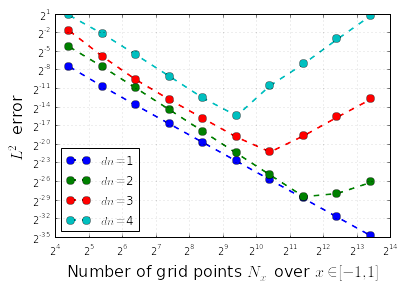

In [14]:
%matplotlib inline
from main import convergence_for_several_derivatives_at_const_LTE, convergence_routine_nonperiodic
convergence_for_several_derivatives_at_const_LTE(NumGrids = 10, _LTE = 3, _dn_max = 4)

We see the expected convergence to at least the LTE = 3 for each derivative. As before, if there exists a central scheme (i.e. odd stencil size = LTE + dn, for example LTE = 3, dn = 4) we expect convergence somewhere close to an order 3.5 since the central scheme cancels off an extra truncation term and is thus order 4 which is mixed with forward/backward schemes near the edges (order 3). The inflection points for each derivative are different. 

The plot on the bottom shows the convergence for all 4 derivatives only occurs in a range $21 < N_x < 336$ (equivalent to $0.0952380 > \Delta x > 0.0059523$

Thus, there exist different optimal ranges where all derivatives converge, and so seeking an analytical estimate for each derivative of an upper bound on $N_x$ (or lower bound on $\Delta x$) is not a worthwhile exercise. Instead, the range can be determined numerically and abided to in employing it in a larger application (e.g. in DECSKS).

## Investigation of regimes where numerical error dominates

We calculate the order as above:

$$\text{order}_i = \log_2\frac{||E_{\Delta x}||_2}{||E_{\Delta x/2}}$$

where $E_{\Delta x} = f_{exact} - f_{\Delta x}$

The truncation error is bounded by constants $C_{\Delta x}, C_{\Delta x / 2}, M_{\Delta x}, M_{\Delta x/2}$, which depend on the mesh spacing, where $C$ limits the size on the LTE and $M$ is associated with the aforementioned numerical source of error (and thus also depends on the machine error $\sim 10^{-16}$. Writing the order of the LTE as $p$, and the derivative order of interest as $n$ (also the negative order with which the machine error scales with). Thus, the above is written as

$$\text{order}_i = \log_2\frac{C_{\Delta x}(\Delta x)^{p} + M_{\Delta x}(\Delta x)^{-n}}{C_{\Delta x / 2}(\Delta x / 2)^{p} + M_{\Delta x / 2}(\Delta x / 2)^{-n}}$$

Formally, we can choose to retain the constants as distinct. The result does not change if we exploit how large the difference there is in order of magnitude between the two sets of constants, i.e. the result does not change if we chose the constants $C_{\Delta x} = C_{\Delta x/2} \sim 1$ and $M_{\Delta x} = M_{\Delta x / 2} \sim \tilde{M}\epsilon \sim \epsilon$ where $\epsilon$ is machine epsilon and $\tilde{M}$ was a multiplicative constant mentioned in a previous section. This also permits a cleaner equation work which is easier to follow and gets to the point more expediently.

\begin{eqnarray*}
\text{order}_i & = &  \log_2\frac{(\Delta x)^{p} + \epsilon (\Delta x)^{-n}}{(\Delta x / 2)^{p} + \epsilon (\Delta x / 2)^{-n}} \\[1em]
& = & \log_2 \left\{ 2^n \frac{\epsilon^{-1}(\Delta x)^{n + p} + 1}{\epsilon^{-1}(2\Delta x)^{n + p} + 1}\right\} \\[1em]
& = & \log_2 2^n + \log_2 \left\{\frac{ \epsilon^{-1}(\Delta x)^{n + p} + 1}{(\epsilon^{-1}2\Delta x)^{n + p} + 1}\right\} \\[1em]
\text{order}_i & = & n + \log_2 \left\{\frac{ \epsilon^{-1}(\Delta x)^{n + p} + 1}{ \epsilon^{-1}(2\Delta x)^{n + p} + 1}\right\} 
\end{eqnarray*}

We consider the case for progressively smaller $\Delta x$, and consider a regime where the numerical error accumulation, $\epsilon (\Delta x)^{-n}$ is sufficiently larger than the LTE term $(\Delta x)^p$, i.e $\epsilon (\Delta x)^{-n} \gg (\Delta x)^p \, \Rightarrow \, \epsilon^{-1}(\Delta x)^{n+p} \ll 1$. Thus, the term in the denominator $\epsilon^{-1}(2\Delta x)^{n + p} \ll 1$ permits an expansion in this small parameter.

\begin{eqnarray*}
\text{order}_i  & = & n + \log_2 \left\{(1 + \epsilon^{-1}(\Delta x)^{n + p})(1 - \epsilon^{-1}(2\Delta x)^{n+p} + \epsilon^{-2}(2\Delta x)^{2(n + p)} + \ldots)\right\} \\[1em]
 & = & n + \log_2 (1 + \epsilon^{-1}(\Delta x)^{n + p}) + \log_2 (1 - \epsilon^{-1}(2\Delta x)^{n+p} + \epsilon^{-2}(2\Delta x)^{2(n + p)} + \ldots )\\[1em]
\text{order}_i  & = & n + \log_2 (1 + \epsilon^{-1}(\Delta x)^{n + p}) + \log_2 (1 - \epsilon^{-1}(2\Delta x)^{n+p}), \qquad \textrm{since } \epsilon^{-1}(2\Delta x)^{2(n+p)} \ll \epsilon^{-1}(2\Delta x)^{n+p}
\end{eqnarray*}

Expanding the logarithms

\begin{eqnarray*}
\text{order}_i  & = & n + (\epsilon^{-1}(\Delta x)^{n + p}) - \epsilon^{-2}(\Delta x)^{2(n + p)}) + \ldots) + (-\epsilon^{-1}(2\Delta x)^{n+p} - \epsilon^{-2}(2\Delta x)^{2(n+p)} + \ldots) 
\end{eqnarray*}

Hence, in the limit of $\Delta x \rightarrow 0$ where the machine error dominates $\epsilon (\Delta x)^{-n} \gg (\Delta x)^p \Rightarrow \epsilon^{-1}(\Delta x)^{n+p} \ll 1$, we recover a positive slope which corresponds to the order of the derivative $n$


$$\boxed{\lim_{\Delta x \rightarrow 0} \text{order}_i = n}, \quad \textrm{when } \epsilon (\Delta x)^{-n} \gg (\Delta x)^p$$


The critical spacing $(\Delta x)_{crit}$ that marks the inflection point (i.e. the point upon which subsequent mesh refinement is dominated by an increasing numerical error) can then be estimated by considering the equality

\begin{eqnarray*}
\epsilon(\Delta x)_{crit}^{-n} & = & (\Delta x)^p_{crit} \\[1em]
\epsilon & = & (\Delta x)^{n + p}_{crit}  \\[1em]
\log \epsilon & = & (n + p)\log (\Delta x)_{crit} \\[1em]
\frac{\log \epsilon }{n + p} & = & \log (\Delta x)_{crit} \\[1em]
\Rightarrow (\Delta x)_{crit} & = & \exp\left[ \frac{\log \epsilon }{n + p} \right] \\[1em]
 & = & \exp\left[\log \epsilon^{1/ (n + p)}\right] \\[1em]
  & = & \exp\left[\log \epsilon^{(n + p)^{-1}}\right] \\[1em]
\Rightarrow (\Delta x)_{crit} & = & \epsilon^{(n + p)^{-1}}
\end{eqnarray*}

Writing $(\Delta x)_{crit} = L / N_{x,crit}$ So we see that,

\begin{eqnarray*}
 (\Delta x)_{crit} := \frac{L}{N_{x,crit}} & = & \epsilon^{(n + p)^{-1}} \\[1em]
\frac{N_{x,crit}}{L} & = & \frac{1}{\epsilon^{(n + p)^{-1}}} \\[1em]
N_{x,crit} & = & \frac{L}{\epsilon^{(n + p)^{-1}}} \\[1em]
\end{eqnarray*}

For the cases plotted above, we have $LTE \equiv p = 3$, $dn \equiv n = 2$, thus the rough estimate of the number of grid points $N_{x,crit}$ needed in a mesh for the numerical error begins to dominate is

In [15]:
import numpy as np

eps = np.finfo(float).eps
p, n = 3, 2
L = 2.

N_xcrit = L  / eps ** (1 / float(n + p))
print "N_x > %g grid points ~ 2^(%2.1f) grid points is the turning point where numerical error dominates" % (N_xcrit, np.log2(N_xcrit))

N_x > 2702.35 grid points ~ 2^(11.4) grid points is the turning point where numerical error dominates


Comparing this with the plots above and the output data tables, which show an inflection point around $N_x \sim 3072$ ($\Delta x = 0.000651041\bar{6}$), this estimate of $N_x \sim 2702$ ($\Delta x = 0.0007401924500370096$) agrees satisfactorily (within $\sim 12\%$). In particular, using the same meshes in the refinement exercise above, we can compare the LTE error $(\Delta x)^p$ with the numerical error $\epsilon (\Delta x)^{-n}$ to see when the changeover in dominating term occurs, and we also plot a scaled L2 error (to fit it on the same plot window) to show these coarse predictions match up quite well with the actual inflection of the L2 errors in the finite difference calculations.

Nx 48 LTE term = 7.2338e-05 numerical error term = 1.27898e-13
Nx 96 LTE term = 9.04225e-06 numerical error term = 5.11591e-13
Nx 192 LTE term = 1.13028e-06 numerical error term = 2.04636e-12
Nx 384 LTE term = 1.41285e-07 numerical error term = 8.18545e-12
Nx 768 LTE term = 1.76606e-08 numerical error term = 3.27418e-11
Nx 1536 LTE term = 2.20758e-09 numerical error term = 1.30967e-10
Nx 3072 LTE term = 2.75947e-10 numerical error term = 5.23869e-10
Nx 6144 LTE term = 3.44934e-11 numerical error term = 2.09548e-09
Nx 12288 LTE term = 4.31168e-12 numerical error term = 8.3819e-09
Nx 24576 LTE term = 5.3896e-13 numerical error term = 3.35276e-08
Nx 49152 LTE term = 6.737e-14 numerical error term = 1.3411e-07
Nx 98304 LTE term = 8.42125e-15 numerical error term = 5.36442e-07


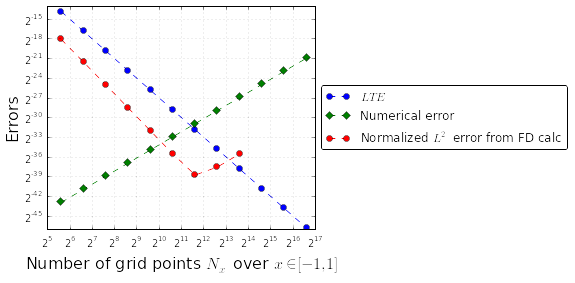

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps # machine epsilon


L = 2.
NumGrids = 12
Nx, LTE, num_error = np.zeros(NumGrids), np.zeros(NumGrids), np.zeros(NumGrids)
for i in range(12):
    Nx[i] = 48 * 2 ** i
    dx = L / Nx[i]
    
    LTE[i] = dx ** 3
    num_error[i] = eps * dx ** (-2)
    
    print "Nx", 48 * 2 **i, "LTE term = %g" % dx ** 3, "numerical error term = %g" % (eps*dx ** (-2))
   
fig, ax = plt.subplots()
ax.loglog(Nx,LTE, '--o', label = '$LTE$')
ax.hold('on')
ax.loglog(Nx, num_error, '--D', label = 'Numerical error')
ax.loglog(grids_dn2_LTE3, L2_error_dn2_LTE3 * 2 ** (-18) / np.max(L2_error_dn2_LTE3), '--o', label = 'Normalized $L^2$ error from FD calc')
ax.set_xscale('log', basex = 2)
ax.set_yscale('log', basey = 2)

plt.xlabel(r'Number of grid points $N_x$ over $x\in [-1,1]$', fontsize = 16)
plt.ylabel('Errors', fontsize = 16)

frame = ax.get_position() # position of plot center

# shrink frame of the plot to make room for a legend on the right side
ax.set_position([frame.x0, frame.y0, 
                 frame.width * 0.8, frame.height])

# Place legend to the right of the shrunken frame
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, ncol=1)

plt.grid()


We can also see by inspection that the <font color = "red">red</font> curve representing the $L^2$ error agrees with the errors (LTE and numerical error). The drop rate of the L2 error is seen to decrease at a rate a bit steeper than the modelled $LTE = \Delta x^3$, as discussed previously (the central scheme is has $LTE = O(\Delta x^4)$ so we acheive a bit higher accuracy, $\sim 3.5$). After the inflection, where the error begins to increase we see it matches very identically to the numerical error slope, which is of order $O(\Delta x^{-2})$ for this second order derivative.

## Conclusions

A class of explicit finite difference formulations for any order derivative of any chosen local truncation error (LTE) has been devised and implemented. The family of explicit schemes of varying handedness and degrees of asymmetry in their grid sampling are stacked inside a NumPy array so that array multiplication with the grid function whose derivative is desired permits direct and efficient calculation of the required valuesfor all grid points without relying on sampling grid points outside the domain as would pervade any finite difference calculation using a single scheme.

The convergence of the derivatives is guaranteed to be at least the selected LTE, though the overall numerical order of convergence can be a bit higher should there exist a central scheme in the family of generated finite difference coefficients (i.e. a central schemes on uniform grids have the benefit of a fortuitous cancellation of an extra term in the LTE which raises their convergence rate by one order), which is applied to most of the domain (i.e. the interior nodes).

In the pursuit of mesh refinement, we noticed higher order derivatives showed inferior calculation as compared with coarser grids. Since there is no analytical means by which this would occur, it was posited that a numerical source of error that scales with the inverse power that is the same order of the derivative must exist. This was included in a simple analytical workup, and a coarse estimate was developed. By examining these coarse estimates of the errors (LTE vs. numerical error buildup), we saw the inflection point where the L2 error in the FD calculation of a derivative begins to increase with finer meshes rather than decrease agreed within 12% for the test case of $\delta^2 f / \delta x^2$ ($LTE = O(\Delta x^3 )$. A final plot showing these errors as well as a scaled L2 error of the FD calculations show a satisfying picture that the L2 error containing a turning point in the vicinity as that predicted by our coarse estimates.